In [1]:
# Stock price source - yahoo finance 
#import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Read stock price csv files 
#apple = pd.read_csv("apple.csv")
zoom = pd.read_csv("zoom.csv")
slack = pd.read_csv("slack.csv")
#ms = pd.read_csv("microsoft.csv")
#google = pd.read_csv("google.csv")
cisco = pd.read_csv("cisco.csv")

#Remove other columns in the df, only keep data and closing price
##apple=apple[["Date","Close"]]

zoom=zoom[["Date","Close"]]

slack=slack[["Date","Close"]]

##ms=ms[["Date","Close"]]

##google=google[["Date","Close"]]

cisco=cisco[["Date","Close"]]

In [20]:
#Merge different stock price dataframe into a combined dataframe
combined_df = pd.merge(zoom, slack, how='outer', on="Date", suffixes=["_Zoom", "_Slack"])
combined_df = pd.merge(combined_df, cisco, how='outer', on="Date")
#combined_df = pd.merge(combined_df, ms, how='outer', on="Date",  suffixes=["_Slack", "_Microsoft"])
#combined_df = pd.merge(combined_df, google, how='outer', on="Date",  suffixes=["_Microsoft", "_Google"])
#combined_df = pd.merge(combined_df, cisco, how='outer', on="Date",  suffixes=["_Google", "_Cisco"])

#chnage the names for columns
combined_df = combined_df.rename(columns = {"Close_Zoom":"Zoom","Close_Slack":"Slack","Close":"Cisco"})
combined_df[["Zoom","Slack","Cisco"]]=combined_df[["Zoom","Slack","Cisco"]].round(2)

combined_df.head()


,Date,Zoom,Slack,Cisco
0,2019-10-31,69.89,22.00,47.51
1,2019-11-01,70.39,21.94,47.03
2,2019-11-04,70.12,21.94,47.48
3,2019-11-05,66.89,20.75,47.76
4,2019-11-06,66.83,20.14,48.27


Text(0, 0.5, 'Stock Price ($)')

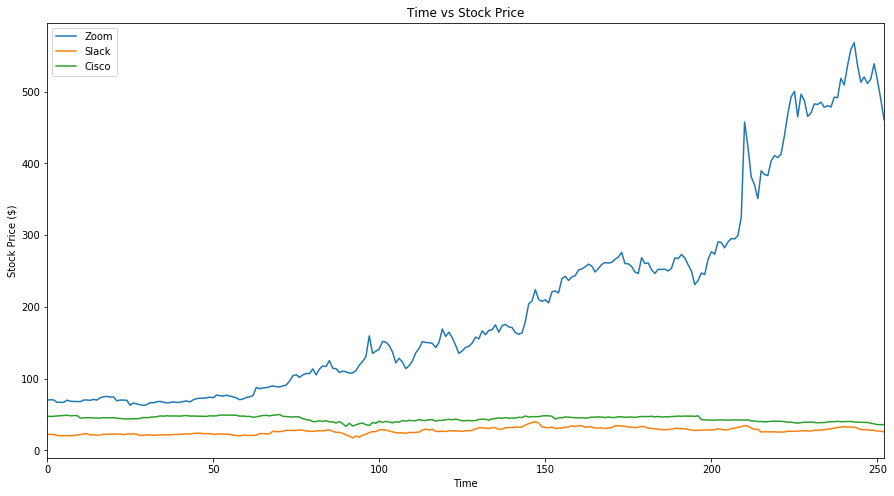

In [22]:
# Create a graph to show relationship 
graph = combined_df.plot(kind="line",figsize=(15,8))
plt.title("Time vs Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price ($)")